# Trabalho Deep Learning



## Bibliotecas Utilizadas

In [1]:
# Básicas
import pandas as pd
import numpy as np
import csv

# Salvar e carregar arquivos
import pickle

# Preprocessamento de textos
# NLTK
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Spacy
!python -m spacy download pt_core_news_sm
import spacy
spacy.prefer_gpu() 
import pt_core_news_sm
#nlp = spacy.load("pt_core_news_sm")
nlp = pt_core_news_sm.load()
from spacy.symbols import nsubj, VERB, obj

import re
from string import punctuation
from unicodedata import normalize
!pip install Unidecode
from unidecode import unidecode

# Métricas, estatísticas e visualização
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from statistics import mean 

# Vetorização
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modelos e auxiliares
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Classificadores
from sklearn.naive_bayes import MultinomialNB
from sklearn import naive_bayes, svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

# Keras
from keras import layers
from keras.layers.core import Dense, Activation, Flatten
from keras.layers import LSTM, SpatialDropout1D, Dropout, Bidirectional, GRU
from keras.layers.embeddings import Embedding
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.text import one_hot
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Utilitárias
!pip install googletrans
from googletrans import Translator
!pip install wget
import wget
import zipfile

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [2]:
# Stopwords

lista_extra = ['casa','ficar','sentir','havia','noite','pessoas','pessoa','alguem','carro',
               'escola','pensar','trabalho','garota','homem','falar','colega','coisas','amigo',
               'passar','querer','amigos','voltar','ouvir','esperar','comigo','perceber',
               'acontecer','dinheiro','amiga','contar','familia','pedir','classe','chegar',
               'sido','conhecer','estudar','professor','fiquei','onibus','causa','quase','crianca',
               'tirar','semana','universidade','realmente','deveria','frente','situacao','aula',
               'filme','trabalhar','menino','maneira','repente','manha','poderia','hora','dormir',
               'assistir','morar','perguntar','comecou','comer','motivo','entender','dias','carta',
               'parar','ligar','horas','mulher','conversar','hospital','cachorro','andar','mudar',
               'sensacao','sala','jovem','comprar','cidade','senti','sendo','resultado','pude',
               'comportamento','sentar','estrada','notas','preparar','anos','seguinte','achar',
               'parecer','visitar','dirigir','apartamento','ninguem','semanas','colocar','volta',
               'marido','porta','tratar','entao','precisar','cama','comecei','escrever','cerca',
               'decidir','ingles','viagem','causar','nota','parente','aparecer','chamar','aulas',
               'livro','emprego','acho','disse','vamos','alguem','alguém','gostaria','hoje','outro',
               'queria','vejo']

all_stopwords = set(stopwords.words('portuguese') + list(punctuation) + list(nlp.Defaults.stop_words) + lista_extra)
#all_stopwords = set(stopwords.words('portuguese') + list(punctuation))


### DataSets Usados
Os datasets originalmente em língua inglesa foram traduzidos para o português

#### Dataset ISEAR
Fonte: http://www.affective-sciences.org/index.php/download_file/view/395/296/
<br><br>
Classes de emoções:<br>
alegria, culpa, desgosto, medo, raiva, tristeza, vergonha

In [3]:
#df_isear = pd.read_csv('isear_data.csv', engine='python', sep ='|', encoding="utf-8")
#df_isear.columns = ['emotion','text']
#df_isear['texto'] = ''

In [4]:
# Traduzir sentenças do dataset ISEAR em português
# translator = Translator()
def ingles_para_portugues(text):
    translator = Translator()
    return (translator.translate(text, src='en', dest='pt').text)

In [5]:
#%%time
#n_sem_traducoes = [df_isear[df_isear['texto'] == ''].index]
#i = 0
#while i <= 499 and len(n_sem_traducoes) > 0:
#    df_isear.loc[n_sem_traducoes[0][i], ['texto']] = ingles_para_portugues( df_isear.loc[n_sem_traducoes[0][i]].at['text'] )
#    i = i + 1

# df_isear['texto'] = df_isear['text'].apply(ingles_para_portugues)

In [6]:
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'joy', 'alegria', df_isear['emotion'])
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'fear', 'medo', df_isear['emotion'])
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'anger', 'raiva', df_isear['emotion'])
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'sadness', 'tristeza', df_isear['emotion'])
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'disgust', 'desgosto', df_isear['emotion'])
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'shame', 'vergonha', df_isear['emotion'])
#df_isear['emotion'] = np.where(df_isear['emotion'] == 'guilt', 'culpa', df_isear['emotion'])

In [7]:
#df_isear.columns = ['classe','texto']

In [8]:
#df_isear.to_csv('isear_ptbr_data.csv', index=False, sep ='|', encoding="utf-8", columns=['classe','texto'])

#### Carregando o dataset ISEAR já traduzido

In [9]:
# Carregar dataset ISEAR traduzido para português
wget.download('http://originalmente.com.br/download/isear_ptbr_data.csv')

df_isear = pd.read_csv('isear_ptbr_data.csv', engine='python', sep ='|', encoding="utf-8")
df_isear = df_isear[df_isear['classe'] != 'culpa']
df_isear = df_isear[df_isear['classe'] != 'vergonha']

In [10]:
df_isear.head()

,classe,texto
0,alegria,"Durante o período de paixão, cada vez que nos ..."
1,medo,Quando me envolvi em um acidente de trânsito.
2,raiva,Quando dirigia para casa após vários dias de t...
3,tristeza,Quando perdi a pessoa que mais significava par...
4,desgosto,A vez que derrubei um cervo - a visão dos feri...


In [11]:
# Distribuição das classes
df_isear['classe'].value_counts()

medo        1081
alegria     1081
raiva       1071
desgosto    1067
tristeza    1067
Name: classe, dtype: int64

#### Dataset Daily Dialog
Fonte: http://yanran.li/dailydialog.html
<br><br>
Classes de emoções:<br>
0: neutro, 1: raiva, 2: desgosto, 3: medo, 4: alegria, 5: tristeza, 6: surpresa

In [13]:
#wget.download('http://originalmente.com.br/download/dailydialog.zip')
#with zipfile.ZipFile('dailydialog.zip', 'r') as file:
#  file.extractall()

In [14]:
'''
df_daily = pd.read_csv('dailydialog.csv', engine='python', sep ='|', encoding="utf-8")
df_daily.columns = ['emotion','text']
df_daily['texto'] = ''
df_daily = df_daily[df_daily['emotion'] != 0]
df_daily = df_daily[df_daily['emotion'] != 6]
df_daily['emotion'] = np.where(df_daily['emotion'] == 4, 'alegria', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == 3, 'medo', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == 1, 'raiva', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == 5, 'tristeza', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == 2, 'desgosto', df_daily['emotion'])
'''

'\ndf_daily = pd.read_csv(\'dailydialog.csv\', engine=\'python\', sep =\'|\', encoding="utf-8")\ndf_daily.columns = [\'emotion\',\'text\']\ndf_daily[\'texto\'] = \'\'\ndf_daily = df_daily[df_daily[\'emotion\'] != 0]\ndf_daily = df_daily[df_daily[\'emotion\'] != 6]\ndf_daily[\'emotion\'] = np.where(df_daily[\'emotion\'] == 4, \'alegria\', df_daily[\'emotion\'])\ndf_daily[\'emotion\'] = np.where(df_daily[\'emotion\'] == 3, \'medo\', df_daily[\'emotion\'])\ndf_daily[\'emotion\'] = np.where(df_daily[\'emotion\'] == 1, \'raiva\', df_daily[\'emotion\'])\ndf_daily[\'emotion\'] = np.where(df_daily[\'emotion\'] == 5, \'tristeza\', df_daily[\'emotion\'])\ndf_daily[\'emotion\'] = np.where(df_daily[\'emotion\'] == 2, \'desgosto\', df_daily[\'emotion\'])\n'

In [15]:
'''
df_daily['emotion'] = np.where(df_daily['emotion'] == '4', 'alegria', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == '3', 'medo', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == '1', 'raiva', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == '5', 'tristeza', df_daily['emotion'])
df_daily['emotion'] = np.where(df_daily['emotion'] == '2', 'desgosto', df_daily['emotion'])
'''

"\ndf_daily['emotion'] = np.where(df_daily['emotion'] == '4', 'alegria', df_daily['emotion'])\ndf_daily['emotion'] = np.where(df_daily['emotion'] == '3', 'medo', df_daily['emotion'])\ndf_daily['emotion'] = np.where(df_daily['emotion'] == '1', 'raiva', df_daily['emotion'])\ndf_daily['emotion'] = np.where(df_daily['emotion'] == '5', 'tristeza', df_daily['emotion'])\ndf_daily['emotion'] = np.where(df_daily['emotion'] == '2', 'desgosto', df_daily['emotion'])\n"

In [16]:
#df_daily.emotion.value_counts()

In [17]:
'''
%%time
n_sem_traducoes = [df_daily[df_daily['texto'] == ''].index]
i = 0
while i < 2000 and len(df_daily[df_daily['texto'] == '']) > 0:
    df_daily.loc[n_sem_traducoes[0][i], ['texto']] = ingles_para_portugues( df_daily.loc[n_sem_traducoes[0][i]].at['text'] )
    i = i + 1

# df_daily['texto'] = df_daily['text'].apply(ingles_para_portugues)
'''

"\n%%time\nn_sem_traducoes = [df_daily[df_daily['texto'] == ''].index]\ni = 0\nwhile i < 2000 and len(df_daily[df_daily['texto'] == '']) > 0:\n    df_daily.loc[n_sem_traducoes[0][i], ['texto']] = ingles_para_portugues( df_daily.loc[n_sem_traducoes[0][i]].at['text'] )\n    i = i + 1\n\n# df_daily['texto'] = df_daily['text'].apply(ingles_para_portugues)\n"

In [18]:
#df_daily.to_csv('dailydialog_ptbr.csv', index=False, sep ='|', encoding="utf-8", columns=['emotion','texto'])

#### Carregando o dataset Daily Dialog já traduzido

In [19]:
# Carregar dataset Daily Dialog traduzido para português
wget.download('http://originalmente.com.br/download/dailydialog_ptbr.zip')
with zipfile.ZipFile('dailydialog_ptbr.zip', 'r') as file:
  file.extractall()

In [20]:
df_daily = pd.read_csv('dailydialog_ptbr.csv', engine='python', sep ='|', encoding="utf-8")

In [21]:
df_daily.head()

,emotion,texto
0,alegria,Essa é uma boa ideia . Ouvi dizer que Mary e S...
1,alegria,"Parece ótimo para mim! Se estiverem dispostos,..."
2,alegria,Bom. Vamos agora.
3,alegria,Tudo certo .
4,alegria,Estou olhando meu horóscopo deste mês! Minha p...


In [22]:
df_daily = df_daily[df_daily['texto'] != '']
df_daily = df_daily.reset_index(drop=True)
df_daily = df_daily[['emotion','texto']]
df_daily.columns = ['classe','texto']

### Unindo os Dois Datasets (ISEAR e Daily Dialog)

In [23]:
df = pd.concat([df_isear, df_daily])
df = df.dropna()

In [24]:
# Definição da lista de classes para uso diverso
labels_classes = df.classe.unique().tolist()
labels_classes.sort()

In [25]:
df['classe'].value_counts()

alegria     13966
tristeza     2217
raiva        2093
desgosto     1420
medo         1255
Name: classe, dtype: int64

## Funções auxiliares

In [26]:
def limpar_texto_simples(texto):
       
    # remove caracteres especiais e números
    # texto = re.sub(r'[^a-zA-Z_]',' ',texto)
    
    texto = re.sub(r'[^\w\s]', '',texto)
    
    texto = texto.lower()
    
    texto = texto.translate(str.maketrans('', '', punctuation))
    
    
    # tokenização com nltk
    palavras = word_tokenize(texto, language='portuguese')
    
    palavras = [palavra for palavra in palavras if palavra not in ['não','nao'] and len(palavra) > 3 and palavra not in all_stopwords]
    
    #tokens = tokenizer.tokenize(texto)
    #tokens = [palavra for palavra in tokens if palavra not in ['não','nao'] and len(palavra) > 3 and palavra not in all_stopwords]
    #texto = ' '.join(tokens)
    
    return ' '.join(palavras).strip()

In [27]:
# Realiza uma limpeza básica de um texto, preparando-o para classificação.
def limpar_texto(texto):

    # Converte para minúsculas
    texto = texto.lower()
    
    # Remove stopwords
    tokens = tokenizer.tokenize(texto)
    tokens = [palavra for palavra in tokens if palavra not in all_stopwords]
    texto = ' '.join(tokens)  
    
    # Remove acentos
    texto = normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    
    # Remove caracteres especiais e números
    texto = re.sub(r'[^a-zA-Z_]',' ',texto)
    
    # Remove espaços extras e palavras menores do que um tamanho mínimo (no exemplo abaixo, 3 caracteres)
    tokens = tokenizer.tokenize(texto)
    tokens = [palavra for palavra in tokens if palavra not in ['não','nao'] and len(palavra) > 3] #and palavra not in all_stopwords]      
    texto = ' '.join(tokens)  
    
    return texto

In [28]:
def get_nome_entidade(text, label):
    if label == 'PER':
        return ''
        #return 'pessoa'
    elif label == 'ORG':
        return ''
        #return 'organização'
    elif label == 'LOC':
        #return 'localização'
        return ''
    elif label == 'MISC':
        return ''
        #return text
    else:
        return text

In [29]:
def replace_text_with_ents(text):
    new_text = text
    doc = nlp(text)
    for ent in doc.ents:
        new_text = new_text.replace(ent.text, get_nome_entidade(ent.text, ent.label_))
    return new_text    

In [30]:
def get_sentenca_principal(text):
    doc_s = nlp(text)
    sentencas = []
    sentencas = [sent.text for sent in doc_s.sents]
    
    i = 0
    s = sentencas[i]
    doc_s = nlp(s)
    tokens = [token.text for token in doc_s if token.pos_ == 'VERB']
    while len(tokens) == 0 and i < len(sentencas):
        i = i + 1
        s += ' ' +sentencas[i]
        doc_s = nlp(s)
        tokens = [token.text for token in doc_s if token.pos_ == 'VERB']
        
    return s

In [31]:
# Calcula métricas de desempenho do classificador. 
def get_metrics(y_test, y_predicted):  
    precision = round(precision_score(y_test, y_predicted, pos_label=1, average='macro'),4)             
    recall = round(recall_score(y_test, y_predicted, pos_label=1, average='macro'),4)
    f1 = round(f1_score(y_test, y_predicted, pos_label=1, average='macro'),4)
    accuracy = round(accuracy_score(y_test, y_predicted),4)
    return accuracy, precision, recall, f1

In [32]:
# Função para exibir gráfico da matriz de confusão
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Inicialização

In [33]:
tokenizer = RegexpTokenizer(r'\w+')
random_state=660601


## Preparando os textos para classificação

### Pré-processamento com Spacy

In [34]:
df['pre'] = df['texto']

#from nltk.stem.snowball import SnowballStemmer

#stemmer = SnowballStemmer(language='portuguese')

def pre_processar_texto(texto):
    if len(texto) == 0:
        return None
        
    text = texto
    text = replace_text_with_ents(text)
    new_text = text
    
    if len(text) < 1000000:
        doc = nlp(text)        
        chosen_tokens = list()
        tokens = [token for token in doc if not token.text in all_stopwords]
        
        for token in tokens:
            if token.is_alpha and token.pos_ not in ['CCONJ','DET','PUNCT','ADP','SYM','NUM']:
                
                if token.pos_ == 'VERB':
                    chosen_tokens.append(token.lemma_ + ' ')
                else: 
                    chosen_tokens.append(token.text.lower() + ' ')                        
                                    
        if len(''.join(chosen_tokens).strip()) > 0:
            new_text = unidecode(''.join(chosen_tokens).strip())

        
    else:
        chosen_tokens = list()
        
        for part_text in text.split('.'):
            doc = nlp(part_text)
            tokens = [token for token in doc if not token.text in all_stopwords]
            for token in tokens:
                if token.is_alpha and token.pos_ not in ['CCONJ','DET','PUNCT','ADP','SYM','NUM']:
                    
                    if token.pos_ == 'VERB':
                        chosen_tokens.append(token.lemma_ + ' ')
                    else: 
                        chosen_tokens.append(token.text.lower() + ' ')
                                                        
        if len(''.join(chosen_tokens).strip()) > 0:
            new_text = unidecode(''.join(chosen_tokens).strip())
            
    return new_text
    

In [35]:
df['pre'] = df['texto']

In [36]:
%%time
#for i in range(0, len(df)):
#  pre_processar(i)

#df['pre'] = df['pre'].apply(get_sentenca_principal)
#df['pre'] = df['pre'].apply(pre_processar_texto)
#df['pre'] = df['pre'].apply(limpar_texto)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [37]:
%%time
#df['pre'] = df['pre'].apply(limpar_texto)
df['pre'] = df['pre'].apply(limpar_texto_simples)

CPU times: user 2.32 s, sys: 3.63 ms, total: 2.33 s
Wall time: 2.33 s


In [38]:
# Algum NA?
df.isna().sum()

classe    0
texto     0
pre       0
dtype: int64

In [39]:
df[df['pre'].isna()].head(20)

,classe,texto,pre


In [40]:
#df = df.dropna()

In [41]:
df.classe.value_counts()

alegria     13966
tristeza     2217
raiva        2093
desgosto     1420
medo         1255
Name: classe, dtype: int64

In [42]:
#df.to_csv('antoniommenezes_dataset.csv', index=False, sep ='|', encoding="utf-8")

In [43]:
#df = pd.read_csv('antoniommenezes_dataset.csv', engine='python', sep ='|', encoding="utf-8")

## Vetorização

In [44]:
vec = CountVectorizer()
vec.fit(df['pre'].tolist())
bag_of_words = vec.transform(df['pre'].tolist())
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

vectorizer = CountVectorizer(ngram_range=(1, 2), analyzer='word', binary=True, stop_words=all_stopwords, min_df=1, max_df=0.50) #, max_features=20000
vectorizer.fit_transform(df['pre'].tolist())


<20951x66147 sparse matrix of type '<class 'numpy.int64'>'
	with 140021 stored elements in Compressed Sparse Row format>

In [45]:
len(vectorizer.vocabulary_)

66147

In [46]:
df_most_freq = pd.DataFrame(words_freq)
df_most_freq.columns = ['word','freq']
df_most_freq = df_most_freq.head(100)

In [47]:
df_most_freq.head(10)

,word,freq
0,ótimo,657
1,feliz,650
2,certo,489
3,gosto,423
4,sinto,335
5,medo,332
6,melhor,324
7,ideia,322
8,claro,312
9,prazer,270


## Treinando e testando classificadores

In [48]:
# Vamos dividir da seguinte forma: 70% para treino, 30% para teste. Os registros deverão ser embaralhados, mas
# a distribuição das classes deve permanecer a mesma para os dois conjuntos de dados
df_train, df_test = train_test_split(df, test_size=0.30, stratify=df['classe'], shuffle=True, random_state=random_state)
print('Tamanho do Treino:',len(df_train),'- Tamanho do Teste:',len(df_test))

Tamanho do Treino: 14665 - Tamanho do Teste: 6286


In [49]:
# Distribuição das classes na massa de treino
df_train.groupby('classe').count()

,texto,pre
classe,,
alegria,9776,9776
desgosto,994,994
medo,878,878
raiva,1465,1465
tristeza,1552,1552


### Regressão Logística

In [50]:
clf = LogisticRegression(solver='sag', C=7, max_iter=20000, n_jobs=-1, random_state=random_state, multi_class='multinomial') 

#### Bag of Words

In [51]:
# Treina o classificador com a massa de treino
X_train = vectorizer.transform(df_train['pre'].tolist())
y_train =  df_train['classe'].tolist()
clf.fit(X_train, y_train)

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=660601, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Avalia a performance do classificador treinado, usando a massa reservada para testes
X_test = vectorizer.transform(df_test['pre'].tolist())
y_test =  df_test['classe'].tolist()
y_predicted = clf.predict(X_test)

In [53]:
# Obtém as métricas de desempenho
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted)
print('Acurácia:',accuracy,'- Precisão:',precision,'- Recall:',recall,'- F1:',f1)

Acurácia: 0.7919 - Precisão: 0.6966 - Recall: 0.5496 - F1: 0.6033


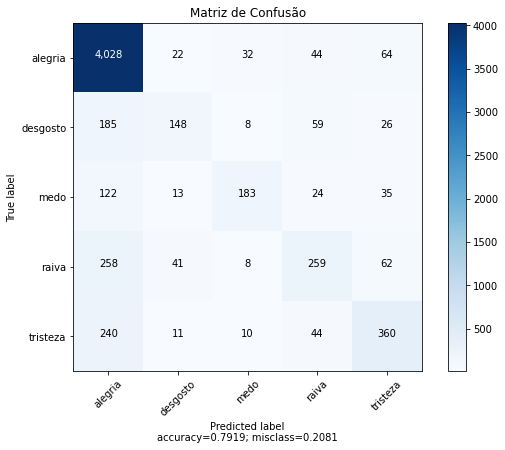

In [54]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_predicted), 
                      normalize    = False,
                      target_names = labels_classes,
                      title        = "Matriz de Confusão")

#### TF-IDF

In [55]:
# TFIDF
Tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2)) #, max_features=10000)
Tfidf_vectorizer.fit(df_train['pre'])
X_train_Tfidf = Tfidf_vectorizer.transform(df_train['pre'].tolist())

In [56]:
clf2 = LogisticRegression(solver='sag', C=7, max_iter=50000, n_jobs=-1, random_state=random_state, multi_class='multinomial')
clf2.fit(X_train_Tfidf, y_train)


LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=660601, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Avalia a performance do classificador treinado, usando a massa reservada para testes
X_test_Tfidf = Tfidf_vectorizer.transform(df_test['pre'].tolist())
y_test_Tfidf =  df_test['classe'].tolist()
y_predicted_Tfidf = clf2.predict(X_test_Tfidf)

In [58]:
# Obtém as métricas de desempenho
accuracy, precision, recall, f1 = get_metrics(y_test_Tfidf, y_predicted_Tfidf)
print('Acurácia:',accuracy,'- Precisão:',precision,'- Recall:',recall,'- F1:',f1)

Acurácia: 0.7996 - Precisão: 0.7049 - Recall: 0.5665 - F1: 0.6189


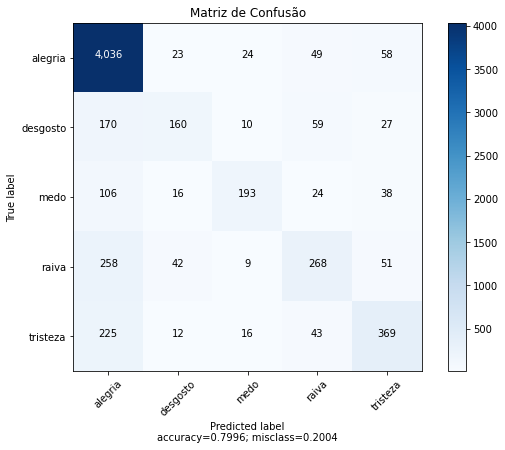

In [59]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_predicted_Tfidf), 
                      normalize    = False,
                      target_names = labels_classes,
                      title        = "Matriz de Confusão")

### Naïve Bayes

In [60]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
score = nb.score(X_train, y_train)
print(score)

0.9294919877258779


In [61]:
%%time
from sklearn.metrics import classification_report

y_predicted_nb = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_predicted_nb))
print(classification_report(y_test, y_predicted_nb))

accuracy 0.7893732103086223
              precision    recall  f1-score   support

     alegria       0.83      0.97      0.89      4190
    desgosto       0.72      0.35      0.47       426
        medo       0.75      0.47      0.58       377
       raiva       0.60      0.41      0.49       628
    tristeza       0.64      0.49      0.55       665

    accuracy                           0.79      6286
   macro avg       0.71      0.54      0.60      6286
weighted avg       0.77      0.79      0.77      6286

CPU times: user 50.6 ms, sys: 959 µs, total: 51.6 ms
Wall time: 52.9 ms


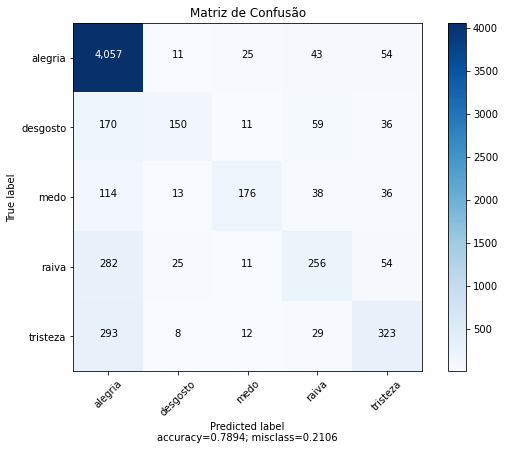

In [62]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_predicted_nb), 
                      normalize    = False,
                      target_names = labels_classes,
                      title        = "Matriz de Confusão")

### Support Vector Machines (SVM)

In [63]:
# Com Bag of Words
svm_bow = svm.LinearSVC(C=1.0, multi_class='crammer_singer', class_weight = 'balanced')
svm_bow.fit(X_train,y_train)

y_predicted_svm_bow = svm_bow.predict(X_test)

print("SVM Accuracy Score -> ",accuracy_score(y_test, y_predicted_svm_bow)*100)

SVM Accuracy Score ->  77.26694241170856


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


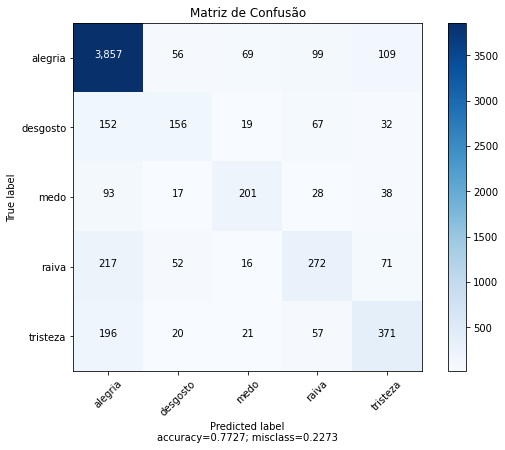

In [64]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_predicted_svm_bow), 
                      normalize    = False,
                      target_names = labels_classes,
                      title        = "Matriz de Confusão")

In [65]:
# Fit vetor de treino TFIDF no classificador
SVM = svm.LinearSVC(C=1.0, multi_class='crammer_singer', class_weight = 'balanced')
#svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_Tfidf,y_train)

y_predicted_svm_tfidf = SVM.predict(X_test_Tfidf)

print("SVM Accuracy Score -> ",accuracy_score(y_test, y_predicted_svm_tfidf)*100)

SVM Accuracy Score ->  78.04645243398028


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


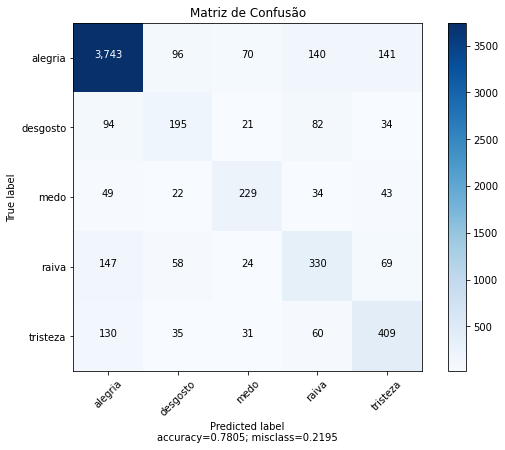

In [66]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, y_predicted_svm_tfidf), 
                      normalize    = False,
                      target_names = labels_classes,
                      title        = "Matriz de Confusão")

### RNN com LSTM

In [67]:
df_train.head()

,classe,texto,pre
11306,alegria,"Obrigado pela sua compreensão, senhor. Vou res...",compreensão senhor reservar
9664,alegria,Esta é a primeira vez! Você deve ter ganhado n...,ganhado loteria
13058,alegria,ESTÁ BEM . Compreendo . Obrigado .,compreendo
13617,raiva,O que há de errado nisso? Eu fico louca por ci...,errado nisso fico louca cigarro
204,alegria,"Já vi isso tantas vezes em livros, mas nunca i...",tantas livros imaginei veria pessoalmente


In [68]:
# Conversões para repassar ao Keras

y_train = df_train['classe'].tolist()
y_test = df_test['classe'].tolist()

encoder = LabelBinarizer()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.fit_transform(y_test)
print('y_train label_encoder', y_train_enc[:5])
print('y_test label_encoder', y_test_enc[:5])

print('Shape of label tensor y_train:', len(y_train_enc))
print('Shape of label tensor y_test:', len(y_test_enc))

textos_train = df_train['pre'].tolist()
textos_test = df_test['pre'].tolist()

tokenizer_keras = Tokenizer(num_words=10000)
tokenizer_keras.fit_on_texts(textos_train)

word_index = tokenizer_keras.word_index
print('Found %s unique tokens.' % len(word_index))

X_train = tokenizer_keras.texts_to_sequences(textos_train)
X_test = tokenizer_keras.texts_to_sequences(textos_test)

vocab_size = len(tokenizer_keras.word_index) + 1
index_of_words = tokenizer_keras.word_index

y_train label_encoder [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]
y_test label_encoder [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
Shape of label tensor y_train: 14665
Shape of label tensor y_test: 6286
Found 11761 unique tokens.


In [69]:
print(vocab_size)
print(textos_train[3])
print(X_train[3])
print(index_of_words)

11762
errado nisso fico louca cigarro
[169, 151, 58, 2966, 1155]
{'feliz': 1, 'ótimo': 2, 'certo': 3, 'gosto': 4, 'melhor': 5, 'medo': 6, 'sinto': 7, 'ideia': 8, 'claro': 9, 'prazer': 10, 'exame': 11, 'durante': 12, 'namorado': 13, 'verdade': 14, 'sozinho': 15, 'morreu': 16, 'encontrar': 17, 'raiva': 18, 'legal': 19, 'espero': 20, 'podemos': 21, 'soube': 22, 'triste': 23, 'pais': 24, 'senhor': 25, 'algum': 26, 'problemas': 27, 'namorada': 28, 'irmão': 29, 'comida': 30, 'novamente': 31, 'sair': 32, 'festa': 33, 'ajuda': 34, 'desculpe': 35, 'vida': 36, 'jantar': 37, 'muitas': 38, 'maravilhoso': 39, 'família': 40, 'amanhã': 41, 'manhã': 42, 'irmã': 43, 'recebi': 44, 'aniversário': 45, 'ajudar': 46, 'sorte': 47, 'ônibus': 48, 'férias': 49, 'ouvi': 50, 'lindo': 51, 'alguma': 52, 'nenhum': 53, 'perfeito': 54, 'cara': 55, 'tchau': 56, 'interessante': 57, 'fico': 58, 'devo': 59, 'feito': 60, 'música': 61, 'pensei': 62, 'exames': 63, 'passado': 64, 'parabéns': 65, 'consegui': 66, 'fazendo': 67,

In [70]:
# alguns processamentos adicionais para normalizar os dados
max_sequence_length = 500
X_train_pad = sequence.pad_sequences(X_train, maxlen=max_sequence_length)
X_test_pad = sequence.pad_sequences(X_test, maxlen=max_sequence_length)

In [71]:
print(labels_classes)

['alegria', 'desgosto', 'medo', 'raiva', 'tristeza']


In [72]:
%%time
# Criando o modelo

#gru_output_size = 128
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=max_sequence_length, output_dim=embedding_vecor_length))
model.add(SpatialDropout1D(0.3))
#model.add(Bidirectional(GRU(units=gru_output_size, dropout=0.2, recurrent_dropout=0.2)))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
model.add(Dense(len(labels_classes), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

CPU times: user 699 ms, sys: 185 ms, total: 884 ms
Wall time: 862 ms


In [73]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3528600   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 500, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 3,748,893
Trainable params: 3,748,893
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
%%time
loss, accuracy = model.evaluate(X_train_pad, y_train_enc, verbose=1)
print('Training Accuracy is {}'.format(accuracy*100))

459/459 [==============================] - 56s 121ms/step - loss: 1.6002 - categorical_accuracy: 0.4276
Training Accuracy is 42.761677503585815
CPU times: user 55.7 s, sys: 562 ms, total: 56.3 s
Wall time: 56.6 s


In [76]:
# cria um checkpoint para salvar os pesos do melhor modelo encontrado no trainamento
checkpointer = ModelCheckpoint(filepath='rnn.best.hdf5', verbose=1, save_best_only=True)
# detecta quando parar
es = EarlyStopping(monitor='val_categorical_accuracy', patience=4, mode='max', verbose=1)

In [77]:
%%time
hist = model.fit(X_train_pad, y_train_enc, validation_data=(X_test_pad, y_test_enc), epochs=5, callbacks=[checkpointer, es], batch_size=128) # batch_size=64,

Epoch 1/5
115/115 [==============================] - ETA: 0s - loss: 0.9377 - categorical_accuracy: 0.6820
Epoch 00001: val_loss improved from inf to 0.77489, saving model to rnn.best.hdf5
115/115 [==============================] - 212s 2s/step - loss: 0.9377 - categorical_accuracy: 0.6820 - val_loss: 0.7749 - val_categorical_accuracy: 0.7367
Epoch 2/5
115/115 [==============================] - ETA: 0s - loss: 0.6013 - categorical_accuracy: 0.7965
Epoch 00002: val_loss improved from 0.77489 to 0.66261, saving model to rnn.best.hdf5
115/115 [==============================] - 216s 2s/step - loss: 0.6013 - categorical_accuracy: 0.7965 - val_loss: 0.6626 - val_categorical_accuracy: 0.7838
Epoch 3/5
115/115 [==============================] - ETA: 0s - loss: 0.3929 - categorical_accuracy: 0.8741
Epoch 00003: val_loss improved from 0.66261 to 0.65812, saving model to rnn.best.hdf5
115/115 [==============================] - 216s 2s/step - loss: 0.3929 - categorical_accuracy: 0.8741 - val_loss:

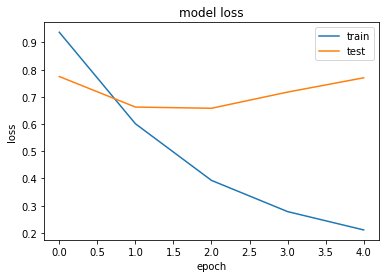

In [78]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

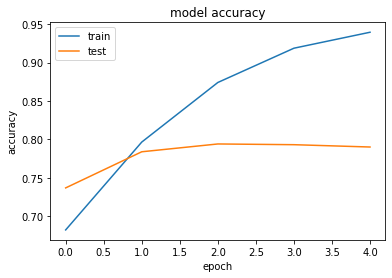

In [79]:
plt.plot(hist.history['categorical_accuracy'], label='train')
plt.plot(hist.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
#model.save('rnn.h5')

In [80]:
# avalia o modelo
score = model.evaluate(X_test_pad, y_test_enc)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict_proba(X_test_pad)
print(pred)

197/197 [==============================] - 25s 125ms/step - loss: 0.7701 - categorical_accuracy: 0.7900

Acurácia:  0.7900095582008362

Predições:
Instructions for updating:
Please use `model.predict()` instead.
[[9.99897361e-01 1.46347156e-05 7.32642457e-06 4.54412257e-05
  3.52215138e-05]
 [8.26584637e-01 2.18453724e-02 1.15931574e-02 1.27399728e-01
  1.25770727e-02]
 [9.90285933e-01 4.71468316e-04 1.57761708e-04 2.23251525e-03
  6.85231760e-03]
 ...
 [9.73115087e-01 4.31838585e-03 4.75717429e-03 4.74758400e-03
  1.30618038e-02]
 [9.31206942e-01 1.09524075e-02 9.56918672e-03 2.25361083e-02
  2.57353745e-02]
 [1.00650704e-02 2.80752897e-01 6.68063089e-02 5.39004728e-02
  5.88475287e-01]]


### RNN com LSTM + Word Embeddings Pré-Treinadas

In [81]:
%%time
wget.download('http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s300.zip')

with zipfile.ZipFile('skip_s300.zip', 'r') as file:
  file.extractall()

from gensim.models import KeyedVectors
# Fonte: http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc

try:
    word_vectors_300
except NameError:
    print('loading word_vectors skip_s300.txt')
    word_vectors = word_vectors_300 = KeyedVectors.load_word2vec_format('skip_s300.txt', binary=False)
    EMBEDDING_DIM = 300

loading word_vectors skip_s300.txt


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 3min 56s, sys: 9.68 s, total: 4min 6s
Wall time: 11min 27s


In [82]:
# Preparando matriz embedding
word_index = tokenizer_keras.word_index
vocabulary_size = min(len(word_index)+1, vocab_size)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

In [83]:
print('EMBEDDING_DIM', EMBEDDING_DIM)
print('vocabulary_size', vocabulary_size)
print('embedding_matrix', embedding_matrix)

EMBEDDING_DIM 300
vocabulary_size 11762
embedding_matrix [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.06486    -0.235111   -0.054545   ... -0.210254   -0.091862
   0.14789701]
 [ 0.02961    -0.106587    0.29595101 ... -0.31621099  0.085867
   0.099205  ]
 ...
 [-0.066371   -0.32743999 -0.199082   ... -0.264386   -0.31326601
  -0.034625  ]
 [ 0.162461   -0.037902    0.13376001 ...  0.25483999  0.082408
   0.061019  ]
 [-0.023454   -0.036739   -0.042249   ... -0.310343   -0.215425
  -0.0302    ]]


In [84]:
%%time
# cria o modelo
#top_words = 5000
#gru_output_size = 128
embedding_vecor_length = 300
#hidden_size = 500
model2 = Sequential()
model2.add(Embedding(vocab_size, input_length=max_sequence_length, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], trainable=False))
model2.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
#model2.add(Dropout(0.2))
model2.add(Dense(len(labels_classes), activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
#model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

CPU times: user 228 ms, sys: 24.9 ms, total: 253 ms
Wall time: 235 ms


In [85]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          3528600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 3,748,893
Trainable params: 220,293
Non-trainable params: 3,528,600
_________________________________________________________________
None


In [86]:
%%time
loss, accuracy = model2.evaluate(X_train_pad, y_train_enc, verbose=1)
print('Training Accuracy is {}'.format(accuracy*100))

459/459 [==============================] - 57s 125ms/step - loss: 1.6128 - categorical_accuracy: 0.2504
Training Accuracy is 25.039207935333252
CPU times: user 57.5 s, sys: 256 ms, total: 57.7 s
Wall time: 57.9 s


In [87]:
# cria um checkpoint para salvar os pesos do melhor modelo encontrado no trainamento
checkpointer = ModelCheckpoint(filepath='rnn_embeddings.best.hdf5', verbose=1, save_best_only=True)
# detecta quando parar
es = EarlyStopping(monitor='val_categorical_accuracy', patience=4, mode='max', verbose=1)

In [88]:
%%time
hist = model2.fit(X_train_pad, y_train_enc, validation_data=(X_test_pad, y_test_enc), epochs=5, callbacks=[checkpointer, es], batch_size=128) # batch_size=64,

Epoch 1/5
115/115 [==============================] - ETA: 0s - loss: 0.9342 - categorical_accuracy: 0.6919
Epoch 00001: val_loss improved from inf to 0.75473, saving model to rnn_embeddings.best.hdf5
115/115 [==============================] - 186s 2s/step - loss: 0.9342 - categorical_accuracy: 0.6919 - val_loss: 0.7547 - val_categorical_accuracy: 0.7389
Epoch 2/5
115/115 [==============================] - ETA: 0s - loss: 0.7064 - categorical_accuracy: 0.7583
Epoch 00002: val_loss improved from 0.75473 to 0.70306, saving model to rnn_embeddings.best.hdf5
115/115 [==============================] - 190s 2s/step - loss: 0.7064 - categorical_accuracy: 0.7583 - val_loss: 0.7031 - val_categorical_accuracy: 0.7560
Epoch 3/5
115/115 [==============================] - ETA: 0s - loss: 0.6586 - categorical_accuracy: 0.7784
Epoch 00003: val_loss improved from 0.70306 to 0.67610, saving model to rnn_embeddings.best.hdf5
115/115 [==============================] - 188s 2s/step - loss: 0.6586 - categor

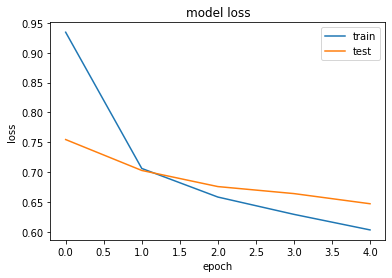

In [89]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

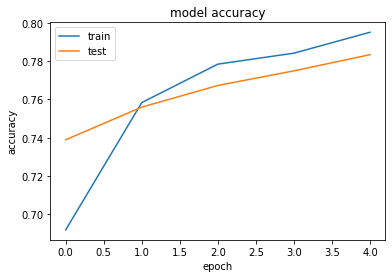

In [90]:
plt.plot(hist.history['categorical_accuracy'], label='train')
plt.plot(hist.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
#model.save('rnn_embeddings.h5')

In [91]:
# avalia o modelo
score = model2.evaluate(X_test_pad, y_test_enc)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model2.predict_proba(X_test_pad)
print(pred)

197/197 [==============================] - 25s 126ms/step - loss: 0.6474 - categorical_accuracy: 0.7833

Acurácia:  0.7833280563354492

Predições:
[[9.8682797e-01 7.3855207e-04 2.4140756e-04 8.1332056e-03 4.0588961e-03]
 [5.8991235e-01 6.4598210e-02 1.9275595e-02 2.7614826e-01 5.0065640e-02]
 [8.5612243e-01 3.6903560e-02 2.1770326e-03 7.8193389e-02 2.6603624e-02]
 ...
 [8.7306732e-01 1.1853614e-02 1.2370457e-02 3.5380524e-02 6.7328133e-02]
 [8.9993489e-01 1.5109094e-02 1.0034780e-02 3.3836074e-02 4.1085199e-02]
 [2.6051578e-01 1.4614101e-01 2.0173633e-01 1.9795164e-01 1.9365527e-01]]


### RESUMO

Comparação entre Algoritmos:<br>

| ALGORITMO    | % ACURÁCIA |
| :--- | ---: | 
| Naive Bayes | 78,94 | 
| SVM | 77,27 (BoW) ~ 78,05 (TFIDF) | 
| Regressão Logística | 79,19 (BoW) ~ 79,96 (TFIDF) | 
| RNN + LSTM | 79,00 | 
| RNN + LSTM + Word Embeddings | 78,33 | 
<br>

Neste trabalho, o algoritmo de redes neurais recorrentes não obteve acurácias significantemente superiores, como era esperado. Na verdade, todos os algoritmos apresentaram acurácias bem semelhantes. Ainda que fossem definidas mais épocas, resultados melhores não apareciam. Minha hipótese é que a limitação na melhora do desempenho está relacionada ao dataset. Há um claro desbalanceamento do dataset e seria necessário um trabalho em equilibrar as frequências de cada classe de emoção. Além disso, também é muito provável continuar com remoção de palavras mais significativas, definindo-as como stopwords em um trabalho recorrente de pré-processamento dos textos.